# **Project Work**

**Equipe**:

**Kelvin Leandro Martins - 540006**

**Pedro Leinos Falcão Cunha - 542114**

## Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import symbols, Function, sqrt, Eq, diff, solve, Matrix, latex
from scipy import signal
from scipy import integrate
from scipy.optimize import fsolve
from IPython.display import display, Math

## Task 1 - System Modelling

### 1.1

Obtain a state-space model of the system, where $x_1(t) = h_1(t)$ and $x_2(t) = h_2(t)$ are state variables, $u(t) = [Q_{in,1}(t), Q_{in,2}(t)]^T$ is the input vector and $y(t) = h_2(t)$ is the output.

In [ ]:
# Symbols for time, state variables, input variables, and parameters
t = symbols('t')
A1, A2, a1, a2, g = symbols('A_1 A_2 a_1 a_2 g')  # parameters

# State variables
x1_t = Function('x_1')(t)
x2_t = Function('x_2')(t)

# Input variables
Qin1_t = sp.Symbol('Q_{in,1}')
Qin2_t = sp.Symbol('Q_{in,2}')

# Torricelli's law for outflows
Qout1_t = a1 * sqrt(2 * g * x1_t)
Qout2_t = a2 * sqrt(2 * g * x2_t)

# State equations
dx1_dt = (Qin1_t - Qout1_t) / A1
dx2_dt = (Qin2_t + Qout1_t - Qout2_t) / A2

# Output equation
y_t = x2_t

display(Math(r'\dot{x}_1(t) = ' + latex(dx1_dt)))
print()
display(Math(r'\dot{x}_2(t) = ' + latex(dx2_dt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 1.2

Given $a_1 = a_2 = 0.1 m^2$, $A_1 = 20 m^2$, $A_2 = 20 m^2$, find the equilibrium state ($\bar{x}_1, \bar{x}_2$) obtained with a constant input $\bar{u} = [1, 0] m^3/s$, approximating gravity acceleration as $g \approx 10 m/s^2$.

In [ ]:
params = {a1: 0.1, a2: 0.1, A1: 20, A2: 20, g: 10, Qin1_t: 1, Qin2_t: 0}
eq1 = Eq(dx1_dt, 0)
eq2 = Eq(dx2_dt, 0)
eq1_subs = eq1.subs(params)
eq2_subs = eq2.subs(params)

# Solving the equations for state variables
equilibrium_solution = solve((eq1_subs, eq2_subs), (x1_t, x2_t))

display(Math(r'\bar{x}_1 = ' + latex(equilibrium_solution[0][0])))
print()
display(Math(r'\bar{x}_2 = ' + latex(equilibrium_solution[0][1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 1.3

Determine the linearised system (A, B, C, D) around the equilibrium state ($\bar{x}_1, \bar{x}_2$)

In [ ]:
x1_eq, x2_eq = 5, 5 # equilibrium state
params.update({x1_t: x1_eq, x2_t: x2_eq})

# State vector and input vector
x = sp.Matrix([x1_t, x2_t])
u = sp.Matrix([Qin1_t, Qin2_t])

# System equations vector
f = Matrix([dx1_dt, dx2_dt])

# Calculate Jacobians
A = f.jacobian(x)
B = f.jacobian(u)
C = Matrix([[0, 1]])  # Output equation only relates to x2_t
D = Matrix([[0, 0]])  # No direct feed-through terms

# Substitute equilibrium values and parameters
A = A.subs(params)
B = B.subs(params)

In [ ]:
display(Math('A = ' + latex(A)))
print()
display(Math('B = ' + latex(B)))
print()
display(Math('C = ' + latex(C)))
print()
display(Math('D = ' + latex(D)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 1.4

Simulate the two systems response to a input step of amplitude A of your choice

In [ ]:
T = np.linspace(0, 3000, 2000)
K = 1 # amplitude
x0 = np.array([0., 0.]) # Initial conditions

# Nonlinear system dynamics
def system_dynamics(X, t):
  a1, a2, A1, A2, g, Qin1, Qin2 = 0.1, 0.1, 20, 20, 10, K, 0
  x1, x2 = X
  dx1dt = (Qin1 - a1 * np.sqrt(2 * g * x1)) / A1
  dx2dt = (Qin2 + a1 * np.sqrt(2 * g * x1) - a2 * np.sqrt(2 * g * x2)) / A2
  return [dx1dt, dx2dt]

# Solve the nonlinear system
nonlinear = integrate.odeint(system_dynamics, x0, T)
# Find the equilibrium points
x_eq = fsolve(system_dynamics, x0, args=(T,))

A_np = np.array([[-0.005,  0.], [0.005, -0.005]])
B_np = np.array([[0.05, 0.], [0., 0.05]])
C_np = np.array([[0., 1.]])
D_np = np.array([[0., 0.]])

# Define the state-space system
system = signal.StateSpace(A_np, B_np, C_np, D_np)

# Simulate linear system
_, y_linear, x_linear = signal.lsim(system, U=0, T=T, X0=x0-x_eq)

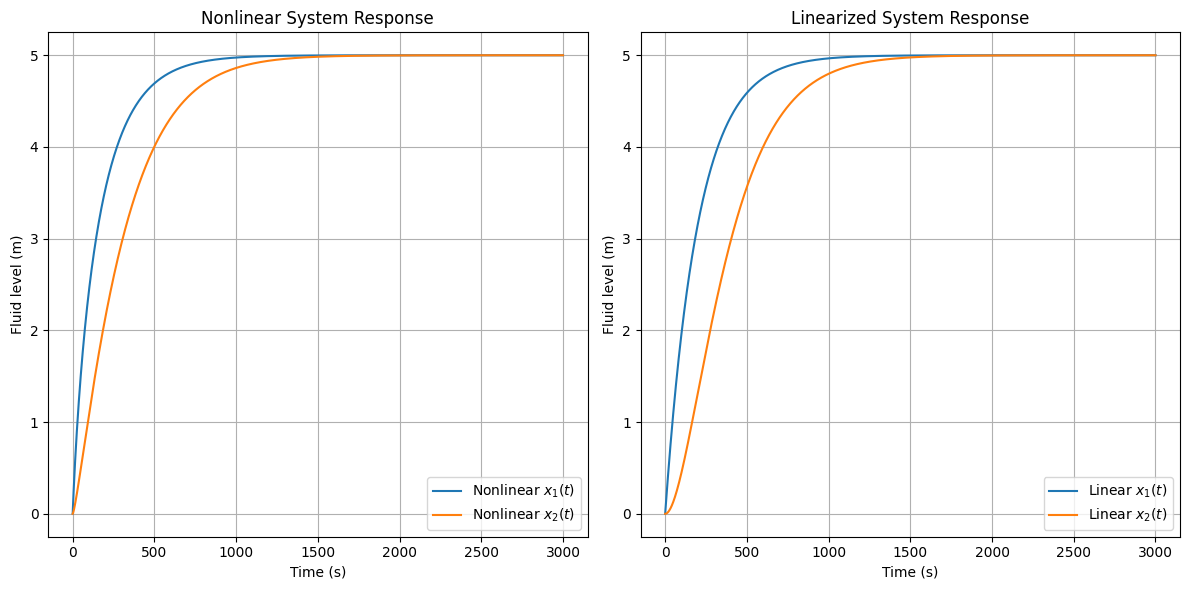

In [ ]:
# Plotting both results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(T, nonlinear[:, 0], label='Nonlinear $x_1(t)$')
plt.plot(T, nonlinear[:, 1], label='Nonlinear $x_2(t)$')
plt.title('Nonlinear System Response')
plt.xlabel('Time (s)')
plt.ylabel('Fluid level (m)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(T, x_linear[:, 0] + x_eq[0], label='Linear $x_1(t)$')
plt.plot(T, x_linear[:, 1] + x_eq[1], label='Linear $x_2(t)$')
plt.title('Linearized System Response')
plt.xlabel('Time (s)')
plt.ylabel('Fluid level (m)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

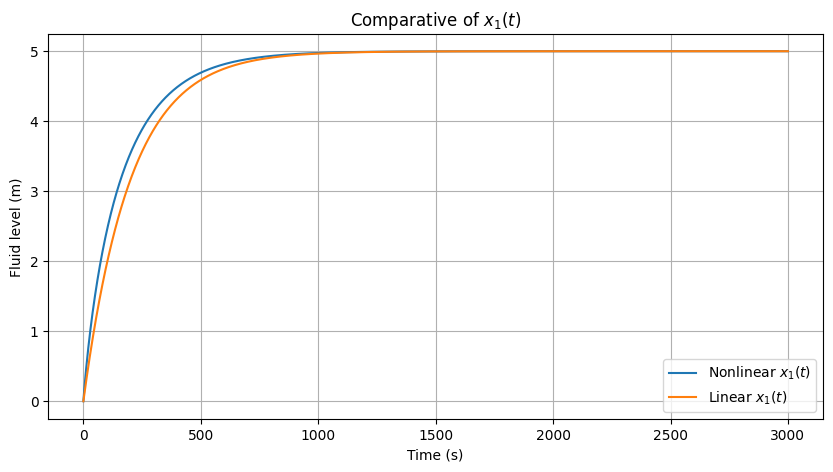

In [ ]:
# Comparing x1(t)
plt.figure(figsize=(10,5))
plt.plot(T, nonlinear[:, 0], label='Nonlinear $x_1(t)$')
plt.plot(T, x_linear[:, 0] + x_eq[0], label='Linear $x_1(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Fluid level (m)')
plt.title('Comparative of $x_1(t)$')
plt.legend()
plt.grid()
plt.show()

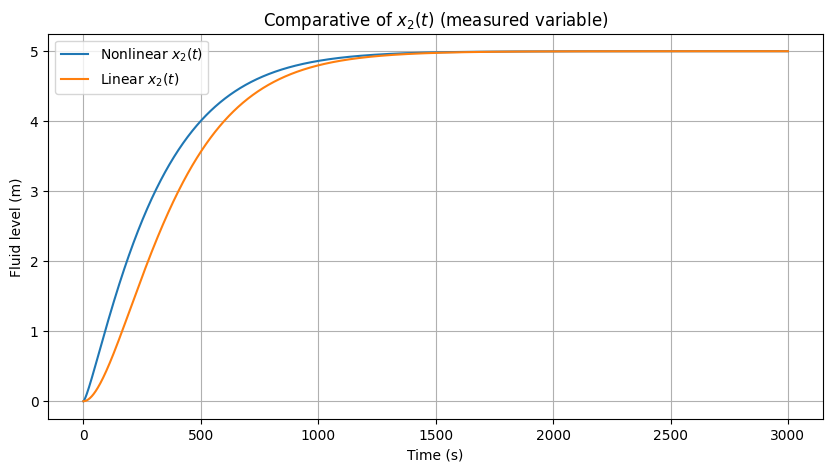

In [ ]:
# Comparing x2 (the output y)
plt.figure(figsize=(10, 5))
plt.plot(T, nonlinear[:, 1], label='Nonlinear $x_2(t)$')
plt.plot(T, x_linear[:, 1] + x_eq[1], label='Linear $x_2(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Fluid level (m)')
plt.title('Comparative of $x_2(t)$ (measured variable)')
plt.legend()
plt.grid()
plt.show()